In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
kernel = np.array([[1/25,1/25,1/25],[1/25,1/25,1/25],[1/25,1/25,1/25]])
pixels = np.array([[100,160,100],[120,150,120],[140,140,140]])
result = np.sum(kernel * pixels)
print(result)

46.800000000000004


In [6]:
def apply_kernel(image, kernel):
    # 画像の高さと幅を取得
    height, width = image.shape[:2]
    kernel_size = kernel.shape[0]  # カーネルのサイズ
    pad = kernel_size // 2  # 畳み込みのためのパディングサイズ
    
    # 結果を格納する配列（元の画像と同じサイズ）
    result = np.zeros((height, width, 3), dtype=np.float32)
    
    # 畳み込み処理
    for i in range(pad, height-pad):
        for j in range(pad, width-pad):
            for d in range(3):
                # 現在のピクセル周囲のカーネルサイズに応じた領域を抽出
                region = image[i-pad:i+pad+1, j-pad:j+pad+1, d]

                # カーネル適用
                filtered_value = np.sum(region * kernel)
                
                # 結果を格納
                result[i, j, d] = filtered_value
                  
    # クリッピング（0から255の範囲に制限）
    result = np.clip(result, 0, 255)

    # 浮動小数点から符号なし整数に型変換
    result = result.astype(np.uint8)
    
    return result

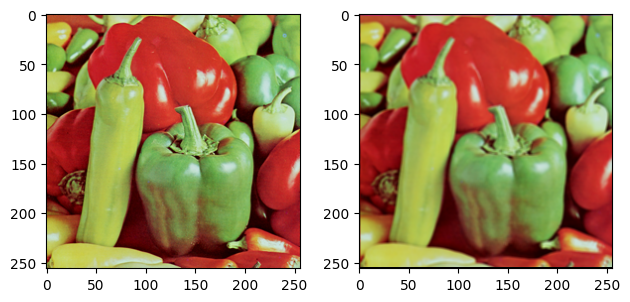

In [7]:
# カーネル定義
kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

# 画像ファイルの読み込み
image = cv2.imread('samples/Pepper.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

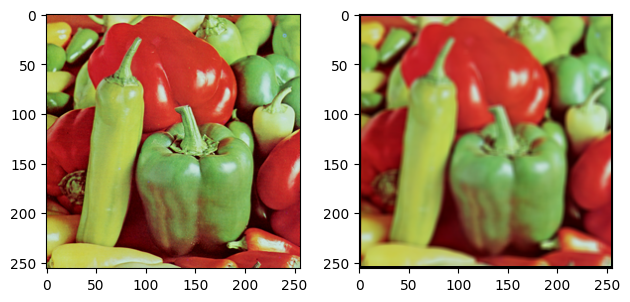

In [93]:
# カーネル定義
kernel = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],[1/25, 1/25, 1/25, 1/25, 1/25],[1/25, 1/25, 1/25, 1/25, 1/25],[1/25, 1/25, 1/25, 1/25, 1/25],[1/25, 1/25, 1/25, 1/25, 1/25]])

# 画像ファイルの読み込み
image = cv2.imread('samples/Pepper.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

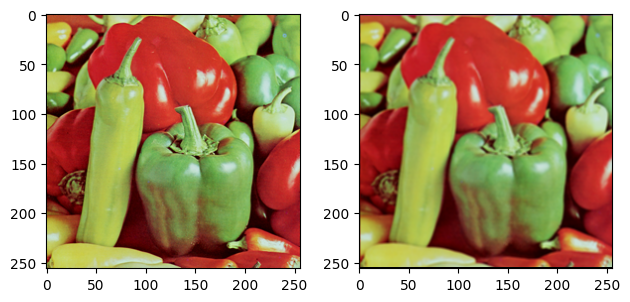

In [94]:
# カーネル定義
kernel = np.array([[1/10, 1/10, 1/10], [1/10, 2/10, 1/10], [1/10, 1/10, 1/10]])

# 画像ファイルの読み込み
image = cv2.imread('samples/Pepper.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

In [95]:
def generate_gaussian_kernel(size, sigma):
    """ガウスカーネルを生成します。"""
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    for x in range(size):
        for y in range(size):
            x_diff = (x - center) ** 2
            y_diff = (y - center) ** 2
            kernel[x, y] = np.exp(-(x_diff + y_diff) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)  # カーネルの合計が1になるように正規化
    return kernel

[[0.07511361 0.12384141 0.07511361]
 [0.12384141 0.20417996 0.12384141]
 [0.07511361 0.12384141 0.07511361]]


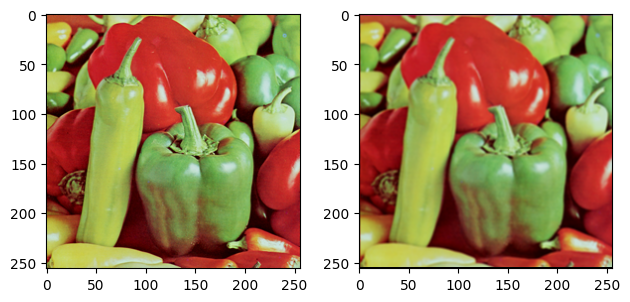

In [99]:
kernel = generate_gaussian_kernel(3, 1.0)
print(kernel)

# 画像ファイルの読み込み
image = cv2.imread('samples/Pepper.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.02193823 0.09832032 0.1621028  0.09832032 0.02193823]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


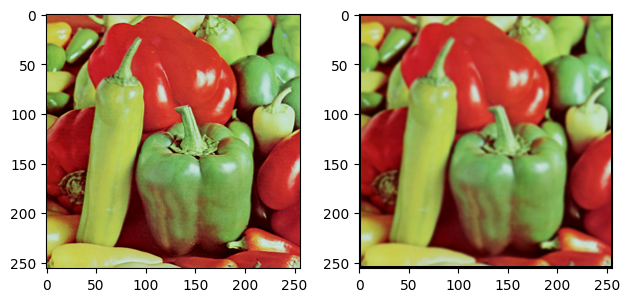

In [101]:
kernel = generate_gaussian_kernel(5, 1.0)
print(kernel)

# 画像ファイルの読み込み
image = cv2.imread('samples/Pepper.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

In [61]:
def apply_kernel_gray(image, kernel):
    # 画像の高さと幅を取得
    height, width = image.shape[:2]
    kernel_size = kernel.shape[0]  # カーネルのサイズ
    pad = kernel_size // 2  # 畳み込みのためのパディングサイズ
    
    # 結果を格納する配列（元の画像と同じサイズ）
    result = np.zeros((height, width), dtype=np.float32)
    
    # 畳み込み処理
    for i in range(pad, height-pad):
        for j in range(pad, width-pad):
       
            # 現在のピクセル周囲のカーネルサイズに応じた領域を抽出
            region = image[i-pad:i+pad+1, j-pad:j+pad+1]

            # カーネル適用
            filtered_value = np.sum(region * kernel)
            
            # 結果を格納
            result[i, j] = filtered_value

    # 浮動小数点から符号あり整数に型変換
    result = result.astype(np.int16)
    
    return result

[[   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0  255    0    0    0 -255    0    0]
 [   0  255    0    0    0 -255    0    0]
 [   0  255    0    0    0 -255    0    0]
 [   0  255    0    0    0 -255    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


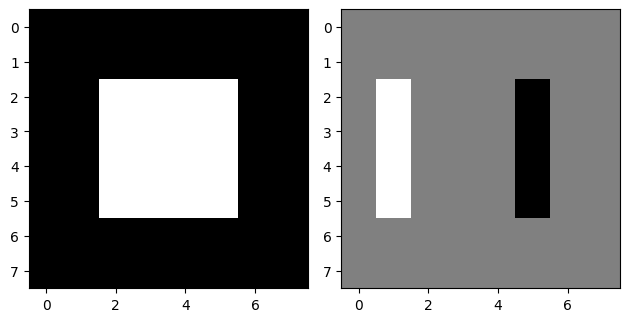

In [69]:
# 8x8の画像
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

# カーネル定義
kernel = np.array([[0, 0, 0],[0, -1, 1],[0, 0, 0]])

# カーネルを適用
edge_image = apply_kernel_gray(image, kernel)
print(edge_image)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image, cmap="gray")
axes[1].imshow(edge_image, cmap="gray")

In [63]:
# 8x8の画像
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 255, 255, 255, 255, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

# カーネル定義
kernel = np.array([[0, 0, 0],[-1, 1, 0],[0, 0, 0]])

# カーネルを適用
edge_image = apply_kernel_gray(image, kernel)
print(edge_image)

[[   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0  255    0    0    0 -255    0]
 [   0    0  255    0    0    0 -255    0]
 [   0    0  255    0    0    0 -255    0]
 [   0    0  255    0    0    0 -255    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


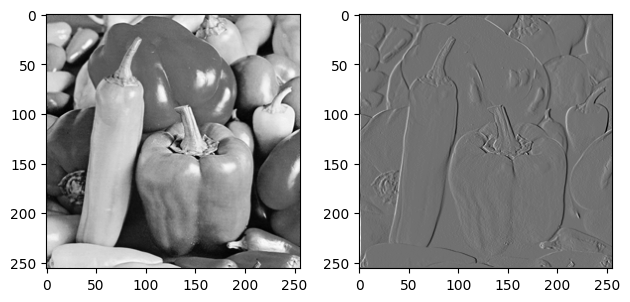

In [68]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Pepper.bmp')

# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネル定義
kernel = np.array([[0, 0, 0],[-1, 1, 0],[0, 0, 0]])
#kernel = np.array([[0, -1, 0],[0, 1, 0],[0, 0, 0]])

# カーネルを適用
edge_image = apply_kernel_gray(image_gray, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_gray, cmap="gray")
axes[1].imshow(edge_image, cmap="gray")

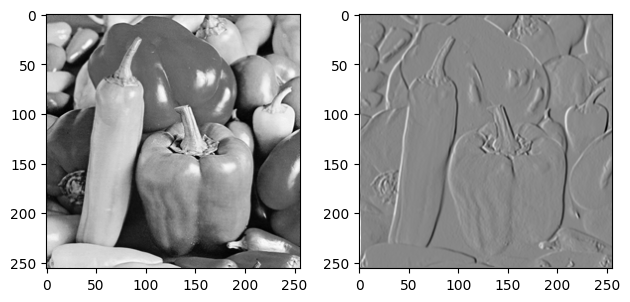

In [70]:
# 画像ファイルの読み込み
image = cv2.imread('samples/Pepper.bmp')

# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネル定義
kernel = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
#kernel = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

# カーネルを適用
edge_image = apply_kernel_gray(image_gray, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_gray, cmap="gray")
axes[1].imshow(edge_image, cmap="gray")